The contents of this course including lectures, labs, homework assignments, and exams have all been adapted from the [Data 8 course at University California Berkley](https://data.berkeley.edu/education/courses/data-8). Through their generosity and passion for undergraduate education, the Data 8 community at Berkley has opened their content and expertise for other universities to adapt in the name of undergraduate education.

In [1]:
#!pip install datascience
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Review
## Chapters 5 - 6

In [ ]:
# Make an array that goes from 3 to 99 by 3 and call the array numerator


In [ ]:
# What is the length on the array numerator?


In [ ]:
#Make an array of 3s that is the same length as numerator and call the array denominator
#hint: use np.full() https://numpy.org/doc/stable/reference/generated/numpy.full.html



In [ ]:
#divide numerator by denominator


In [ ]:
# Import movies_by_year_with_ticket_price.csv as movies



In [ ]:
#Find the highest grossing movie


In [ ]:
#Find the movie with the most ticket sales by dividing total gross by average ticket price


In [ ]:
#Find the movie with the fewest ticket sales by dividing total gross by average ticket price


# Chapter 6: Tables
- There are too many Table functions to list here.  
- [Table documentation](http://data8.org/datascience/tables.html)
- Here are some functions to get us started
    - Table.read_table(file_name) to load .csv file as a Table
    - Table.with_columns('Label_1', Values_1, 'Label_2', Values_2, etc.)) to create Table
    - Table.columns('Label') to get array of values from Label index
    - .sum('Label'), .min('Label'), .max('Label') of values from Label index
    - .drop('Label') to drop Label from Table
    - Table.sort('Label') sorts the rows in increasing order
    - Table.take('row_numbers') keeps the numbered row (indexing starts at 0)
    - Table.where('Label', condition) keeps rows where condition is satisfied.

## Discussion Question: NBA Salaries

Create an array containing the names of all point guards (PG) who make more than 15M/year.

In [2]:
nba = Table.read_table('nba_salaries.csv')
nba

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [3]:
nba = nba.relabeled(3, 'SALARY').drop('TEAM')
nba.show(3)

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625


In [6]:
# Create an array containing the names of all point guards (PG) who make more thatn %15M/year.
guards = nba.where('POSITION', 'PG')
guards.where('SALARY', are.above(15)).column('PLAYER')

array(['Derrick Rose', 'Kyrie Irving', 'Chris Paul', 'Russell Westbrook',
       'John Wall'], dtype='<U24')

## Attributes
- Values in a column of a table should be of the same type and be comparable in some way
- Numerical
    * Numerical values are ordered
    * Difference are meaningful
- Categorical
    * May or may not be ordered
- Numerical data can be categorical
    - Census gender data is coded as 0, 1, or 2.  
    - It would be meaningless to perform arthimitic on these data
    - SEX or Gender data is categorical eventhough it is numerical

## Census data
- Column SEX 1 == Male, 2 == Female, 0 == Total (male + female)
- Column POPESTIMATE2010 is 7/1/2020 population estimate
- Column AGE == 999 == total of all ages
- Column AGE is not necessarialy comparible because of 999 value


# Census Demo
Create a table that shows total population of each age bracket in 2010 and 2014

In [7]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [8]:
partial = full.select('SEX', 'AGE', 'CENSUS2010POP', 'POPESTIMATE2014')
partial.show(4)

SEX,AGE,CENSUS2010POP,POPESTIMATE2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190


In [9]:
simple = partial.relabeled(2, '2010').relabeled(3, '2014')
simple.show(4)

SEX,AGE,2010,2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190


In [10]:
simple.sort('AGE')

SEX,AGE,2010,2014
0,0,3944153,3948350
1,0,2014276,2017857
2,0,1929877,1930493
0,1,3978070,3962123
1,1,2030853,2023253
2,1,1947217,1938870
0,2,4096929,3957772
1,2,2092198,2022502
2,2,2004731,1935270
0,3,4119040,4005190


In [11]:
simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
0,999,308745538,318857056
1,999,151781326,156936487
2,999,156964212,161920569
0,100,53364,72197
1,100,9162,13729
2,100,44202,58468
0,99,32266,41828
1,99,6073,9037
2,99,26193,32791
0,98,45900,60185


In [12]:
no_999 = simple.where('AGE', are.below(999))
everyone = no_999.where('SEX', 0).drop('SEX')

In [13]:
everyone

AGE,2010,2014
0,3944153,3948350
1,3978070,3962123
2,4096929,3957772
3,4119040,4005190
4,4063170,4003448
5,4056858,4004858
6,4066381,4134352
7,4030579,4154000
8,4046486,4119524
9,4148353,4106832


## Visualization ##

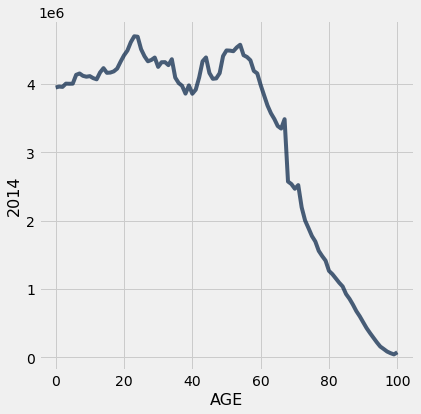

In [14]:
everyone.plot('AGE', '2014')

# Chapter 7: Visualization
Tables are a powerful way of organizing data.  However, large tables are difficult to digest so it is better to graph the data in a table.

## Let's look at the Census data again

In [15]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [16]:
# Keep only the columns we care about
partial = full.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [17]:
# Make things easier to read
simple = partial.relabeled(2, '2010').relabeled(3, '2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [18]:
# Sort by age
simple.sort('AGE')

SEX,AGE,2010,2014
0,0,3951330,3948350
1,0,2018420,2017857
2,0,1932910,1930493
0,1,3957888,3962123
1,1,2020332,2023253
2,1,1937556,1938870
0,2,4090862,3957772
1,2,2088685,2022502
2,2,2002177,1935270
0,3,4111920,4005190


In [19]:
# Sort by age (another way)
simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
0,999,309347057,318857056
1,999,152089484,156936487
2,999,157257573,161920569
0,100,54409,72197
1,100,9351,13729
2,100,45058,58468
0,99,32178,41828
1,99,6104,9037
2,99,26074,32791
0,98,47037,60185


## Line Plots ##

In [20]:
# Remove the age totals
no_999 = simple.where('AGE', are.below(999))

In [21]:
# Remove male and female (keep only combined)
everyone = no_999.where('SEX', 0).drop('SEX')

In [22]:
everyone

AGE,2010,2014
0,3951330,3948350
1,3957888,3962123
2,4090862,3957772
3,4111920,4005190
4,4077552,4003448
5,4064653,4004858
6,4073013,4134352
7,4043047,4154000
8,4025604,4119524
9,4125415,4106832


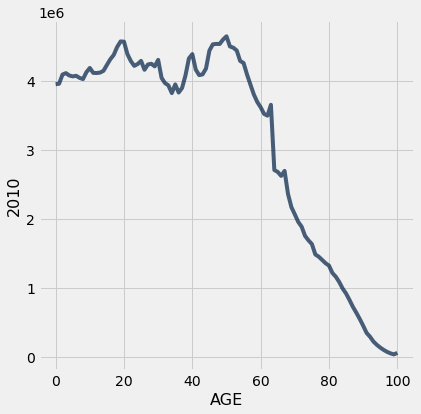

In [23]:
everyone.plot('AGE', '2010')

In [ ]:
# ^^ That plot should be labeled! Here are 3 ways to label it:

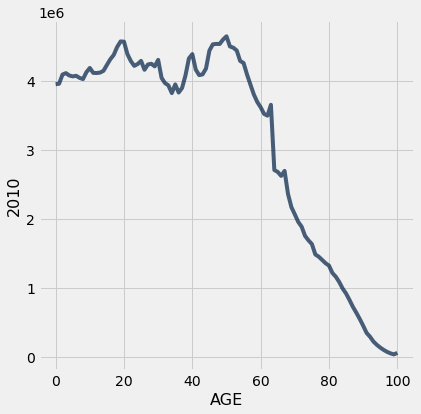

In [24]:
# US Population  <--- Just add a comment

everyone.plot('AGE', '2010')

US Population


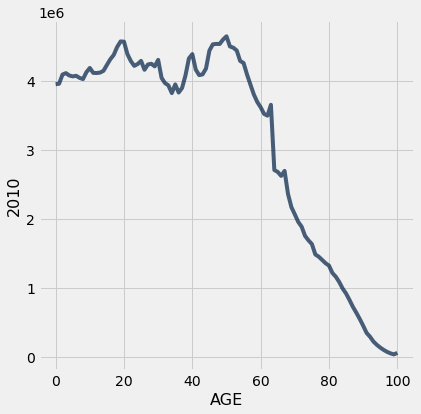

In [25]:
everyone.plot('AGE', '2010')
print('US Population')  # <--- Print out what it is

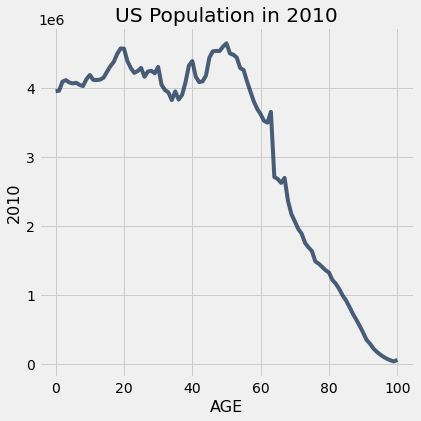

In [27]:
# Add title to plot
everyone.plot('AGE', '2010')
plots.title('US Population in 2010');

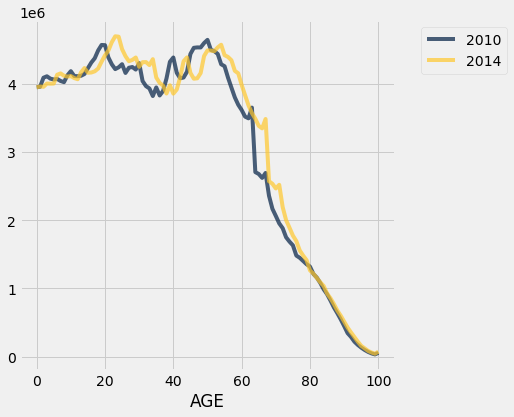

In [28]:
# Age distribution for two different years
everyone.plot('AGE')

## Males and Females in 2014 ##

In [29]:
# Let's compare male and female counts per age
males = no_999.where('SEX', 1).drop('SEX')
females = no_999.where('SEX', 2).drop('SEX')

In [30]:
pop_2014 = Table().with_columns(
    'Age', males.column('AGE'),
    'Males', males.column('2014'),
    'Females', females.column('2014')
)
pop_2014

Age,Males,Females
0,2017857,1930493
1,2023253,1938870
2,2022502,1935270
3,2048618,1956572
4,2043498,1959950
5,2043467,1961391
6,2110328,2024024
7,2122240,2031760
8,2105122,2014402
9,2097272,2009560


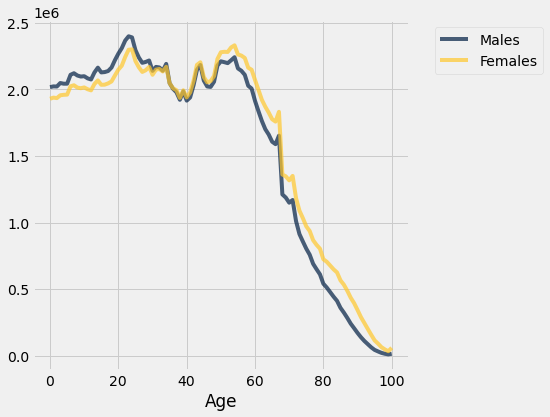

In [31]:
pop_2014.plot('Age')

In [32]:
# Calculate the percent female for each age
total = pop_2014.column('Males') + pop_2014.column('Females')
pct_female = pop_2014.column('Females') / total * 100
pct_female

array([48.89366444, 48.93512897, 48.89796583, 48.85091594, 48.95654945,
       48.9752945 , 48.95625723, 48.91092922, 48.89890191, 48.93212091,
       48.9734048 , 48.99969062, 48.99606517, 48.95633512, 48.86619665,
       48.88170995, 48.86445062, 48.88986227, 48.76308397, 48.668799  ,
       48.63932932, 48.5330796 , 48.66269094, 48.92327135, 49.03933504,
       49.08996242, 49.16509171, 49.21162965, 49.28169646, 49.44899983,
       49.65375766, 49.75983547, 49.86565039, 49.93824999, 49.74770193,
       49.99251351, 50.05521355, 50.20280862, 50.18189092, 50.10049432,
       50.31587643, 50.47966604, 50.40624483, 50.42907187, 50.23118137,
       50.32445422, 50.37830234, 50.53327291, 50.51106084, 50.55818402,
       50.75941276, 50.86725098, 50.93664868, 51.06392595, 50.97417608,
       51.18857886, 51.29709649, 51.45934869, 51.62031101, 51.70400468,
       51.97408419, 52.08985538, 52.15439053, 52.36152155, 52.36785492,
       52.49779211, 52.53185996, 52.56760719, 52.90700545, 53.15

In [33]:
# Round it to 3 so that it's easier to read
pct_female = np.round(pct_female, 3)
pct_female

array([48.894, 48.935, 48.898, 48.851, 48.957, 48.975, 48.956, 48.911,
       48.899, 48.932, 48.973, 49.   , 48.996, 48.956, 48.866, 48.882,
       48.864, 48.89 , 48.763, 48.669, 48.639, 48.533, 48.663, 48.923,
       49.039, 49.09 , 49.165, 49.212, 49.282, 49.449, 49.654, 49.76 ,
       49.866, 49.938, 49.748, 49.993, 50.055, 50.203, 50.182, 50.1  ,
       50.316, 50.48 , 50.406, 50.429, 50.231, 50.324, 50.378, 50.533,
       50.511, 50.558, 50.759, 50.867, 50.937, 51.064, 50.974, 51.189,
       51.297, 51.459, 51.62 , 51.704, 51.974, 52.09 , 52.154, 52.362,
       52.368, 52.498, 52.532, 52.568, 52.907, 53.154, 53.405, 53.592,
       53.929, 54.4  , 54.642, 54.728, 55.249, 55.702, 56.179, 56.816,
       57.278, 57.97 , 58.654, 59.426, 60.31 , 61.159, 62.261, 63.24 ,
       64.423, 65.71 , 66.783, 67.659, 69.009, 69.972, 71.585, 72.745,
       74.225, 75.542, 77.322, 78.395, 80.984])

In [34]:
# Add female percent to our table
pop_2014 = pop_2014.with_column('Percent female', pct_female)
pop_2014

Age,Males,Females,Percent female
0,2017857,1930493,48.894
1,2023253,1938870,48.935
2,2022502,1935270,48.898
3,2048618,1956572,48.851
4,2043498,1959950,48.957
5,2043467,1961391,48.975
6,2110328,2024024,48.956
7,2122240,2031760,48.911
8,2105122,2014402,48.899
9,2097272,2009560,48.932


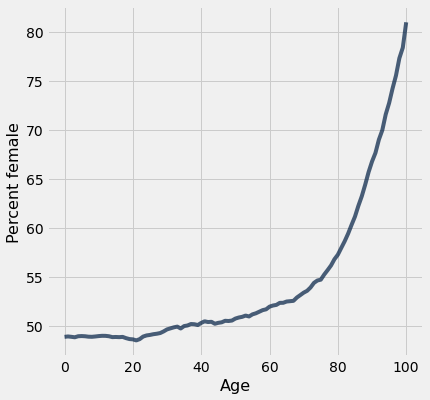

In [35]:
pop_2014.plot('Age', 'Percent female')

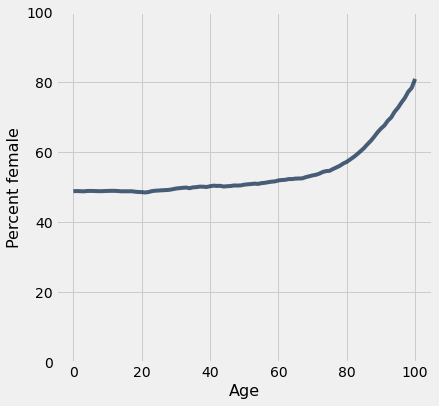

In [36]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think.
pop_2014.plot('Age', 'Percent female')
plots.ylim(0, 100);

## Scatter Plots ##

In [37]:
# Actors and their highest grossing movies
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


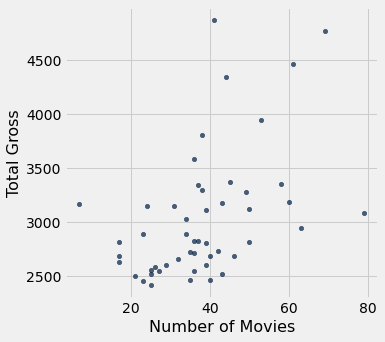

In [38]:
actors.scatter('Number of Movies', 'Total Gross')

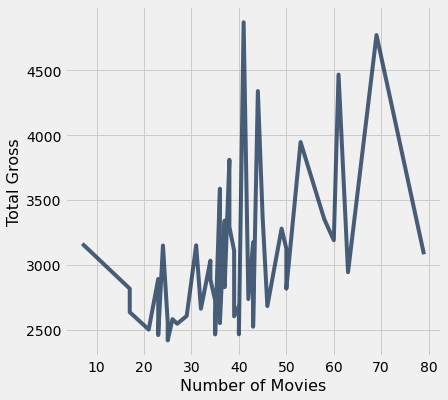

In [39]:
actors.plot('Number of Movies', 'Total Gross')

## When to use line vs. scatter

* use line plots for sequential data if:
    * your x-axis has order
    * differences in y values are meaningful
    * there's only on y-value for each x-value
    * X values are usually time or distance
* use scatter plots for non-sequential data
    * When looking for associations

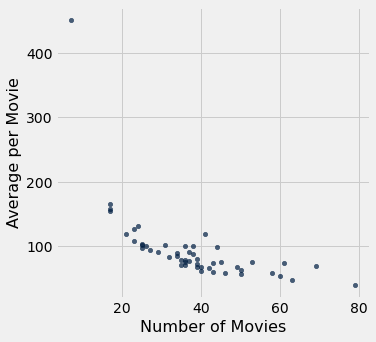

In [40]:
actors.scatter('Number of Movies', 'Average per Movie')

In [41]:
actors.where('Average per Movie', are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


## Bar Charts ##

## C-3P0
#### Anthony Daniels, actor

<img src="C3P0.png" style="width: 200px;"/>

https://en.wikipedia.org/wiki/C-3PO

In [42]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [43]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [44]:
# Convert to millions of dollars for readability
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


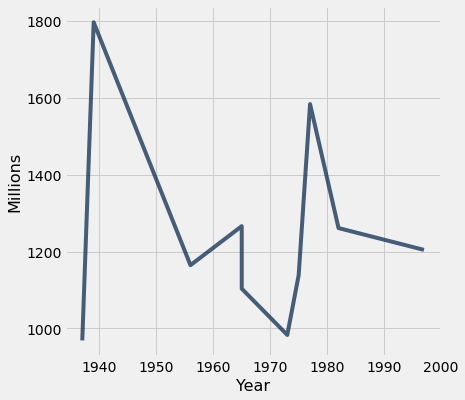

In [45]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

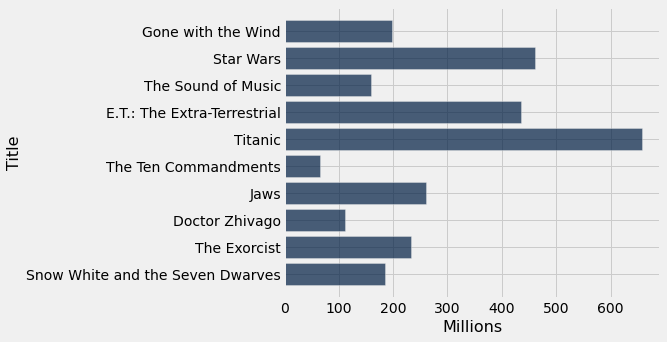

In [46]:
top_movies = top_movies.with_column('Millions', np.round(top_movies.column('Gross')/1000000,3))
top_movies.take(np.arange(10)).barh('Title', 'Millions')

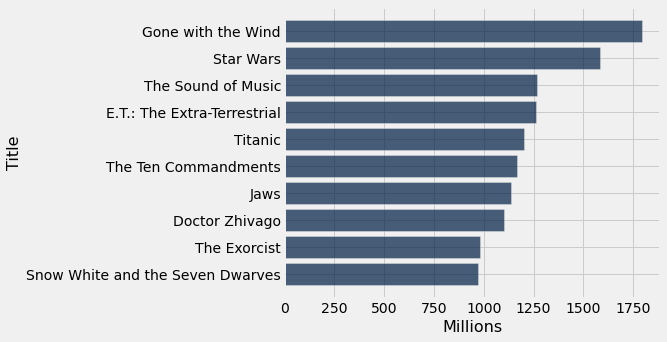

In [47]:
top10_adjusted.barh('Title', 'Millions')

## Generate the bar chart shown for the 10 highest grossing movies (non-adjusted)

<img src = 'barchartmovies.png'>

In [48]:
top10 = top_movies.sort('Gross', descending = True).take(np.arange(10))
gross_millions = np.round(top10.column('Gross') / 1000000, 3)
top10 = top10.with_column('Millions', gross_millions)
top10_year = top10.with_column('Age', 2021 - top10.column('Year'))

In [49]:
top10_year

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
Star Wars: The Force Awakens,Buena Vista,936662225,961143200,2015,936.662,6
Avatar,Fox,760507625,865082100,2009,760.508,12
Titanic,Paramount,658672302,1204368000,1997,658.672,24
Jurassic World,Universal,652270625,702747400,2015,652.271,6
Marvel's The Avengers,Buena Vista,623357910,683474000,2012,623.358,9
The Dark Knight,Warner Brothers,534858444,661980500,2008,534.858,13
Rogue One: A Star Wars Story,Buena Vista,532177324,537326000,2016,532.177,5
Beauty and the Beast (2017),Buena Vista,504014165,504014165,2017,504.014,4
Finding Dory,Buena Vista,486295561,499245400,2016,486.296,5
Star Wars: Episode I - The Phantom Menace,Fox,474544677,802874300,1999,474.545,22


Text(0.5, 1.0, '10 highest grossing movies of all time')

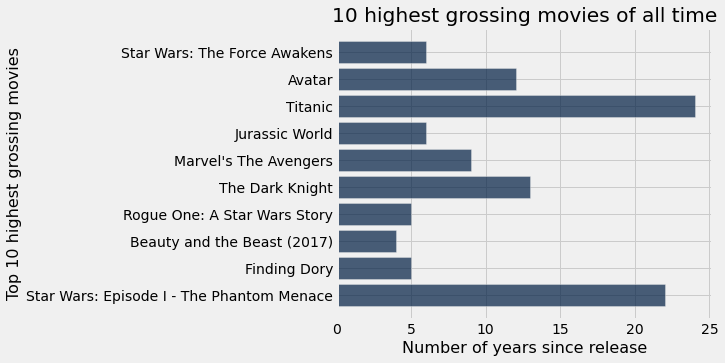

In [51]:
top10_year.barh('Title', 'Age')
plots.xlabel("Number of years since release")
plots.ylabel("Top 10 highest grossing movies")
plots.title("10 highest grossing movies of all time")

## What's wrong with the the figure below? 
### Remake a horizontal bar plot with the data on the y-axis going to zero.

<img src='bush_tax_cut.jpg'>

https://www.kdnuggets.com/2012/12/taking-misleading-statistics-to-a-new-level.html

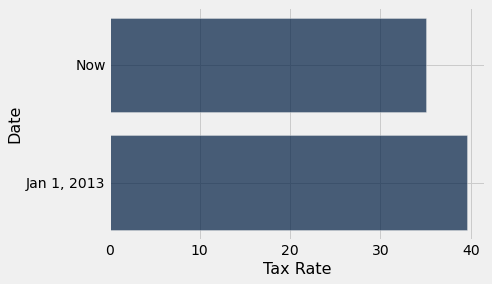

In [52]:
bush = Table().with_columns('Date', ['Now', 'Jan 1, 2013'],
                           'Tax Rate', [35, 39.6])
bush.barh('Date')

## Catagorical Distributions
* Bar Charts are commonly used to visualize catergorical distributions
* One axis is categorical, one numerical
* The distribution of a variable (a column e.g. studios) describes the frequencies of its different values.
* The group function counts the number of rows for each value in the column. (e.g. the number of movies released by each studio
* Bar charts can display the distribution of a categorical variable (e.g. studios)
    * One bar for each category
    * Length of bar is the count of individuals in that category
    * You can choose the order of the bars

In [53]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [54]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [55]:
studio_distribution = studios.group('Studio')

In [56]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [57]:
sum(studio_distribution.column('count'))

200

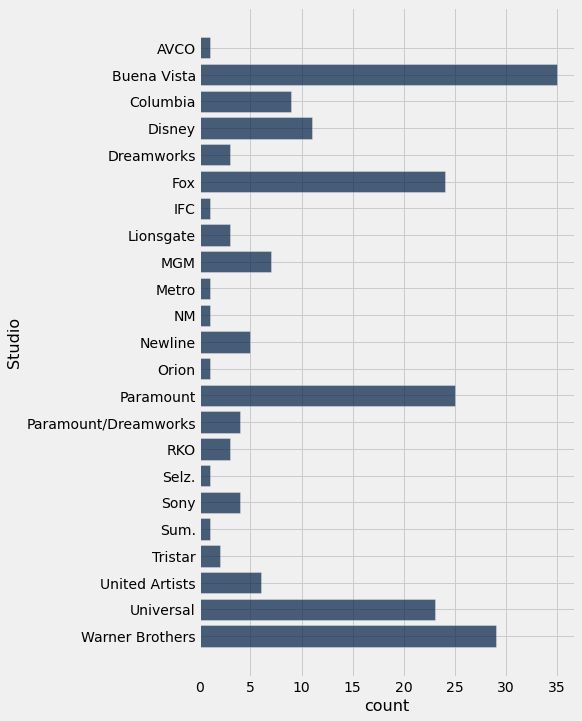

In [58]:
studio_distribution.barh('Studio')

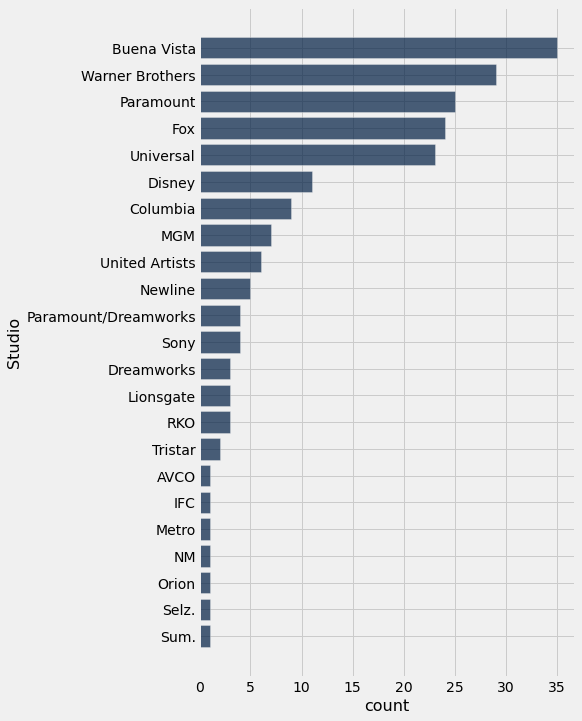

In [59]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution
### Binning Numerical Values
Binning is counting the number of numberical values that lie within ranges, called bins
* Bins are defined by their lower bounds (inclusive)
* The upper bound is the lower bound of the next bin
* Counts all the values that are greater than or equal to the value in the bin but less than the next value in the bin
* The last bin is always zero because there is no upper bound

In [62]:
ages = 2022 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [63]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,83
Star Wars,Fox,460998007,1583483200,1977,45
The Sound of Music,Fox,158671368,1266072700,1965,57
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,40
Titanic,Paramount,658672302,1204368000,1997,25
The Ten Commandments,Paramount,65500000,1164590000,1956,66
Jaws,Universal,260000000,1138620700,1975,47
Doctor Zhivago,MGM,111721910,1103564200,1965,57
The Exorcist,Warner Brothers,232906145,983226600,1973,49
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,85


In [64]:
min(ages), max(ages)

(5, 101)

In [71]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [72]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,20
100,0


In [73]:
sum(binned_data.column('Age count'))

199

In [75]:
top_movies.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,81
25,70
50,39
75,9
100,0


In [76]:
top_movies.bin('Age', bins = np.arange(0, 100, 10))

bin,Age count
0,25
10,36
20,36
30,26
40,28
50,21
60,16
70,5
80,6
90,0


In [77]:
top_movies.where('Age', are.above(70)).show(11)

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,83
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,85
Fantasia,Disney,76408097,738256500,1941,81
Pinocchio,Disney,84254167,599215600,1940,82
Bambi,RKO,102247150,566403700,1942,80
The Bells of St. Mary's,RKO,21333333,557803900,1945,77
Cinderella (1950),Disney,93141149,536079700,1950,72
The Best Years of Our Lives,RKO,23650000,488950000,1946,76
Duel in the Sun,Selz.,20408163,453571400,1946,76
Sergeant York,Warner Brothers,16361885,427815200,1941,81


## Histograms ##

In [78]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100], dtype=int64)

In [79]:
binned_data

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,20
100,0


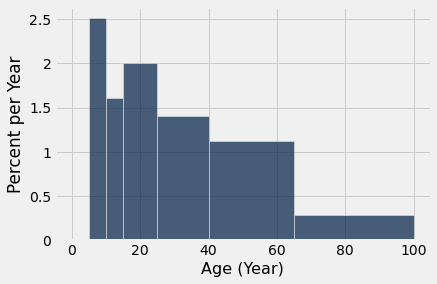

In [81]:
# Let's make our first histogram!
top_movies.hist('Age', bins = my_bins, unit = 'Year')

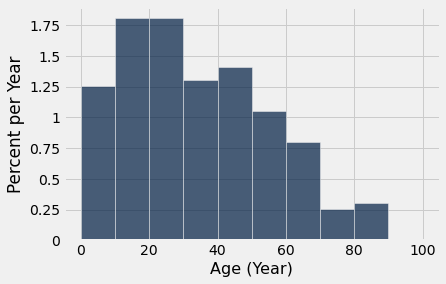

In [82]:
# Let's try equally spaced bins instead.
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

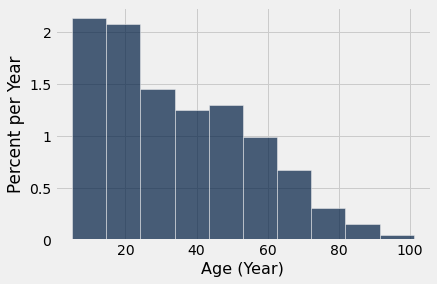

In [83]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit='Year')

## Histogram height
area = height*width

area = percent

height = percent/width

Let's calcualte percent first

In [84]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [85]:
binned_data

bin,Age count,Percent
0,0,0
5,25,12.5
10,16,8
15,40,20
25,42,21
40,56,28
65,20,10
100,0,0


### Question: What is the height of the [40, 65] bin?

In [86]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)
percent

28.0

In [87]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [88]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

1.12

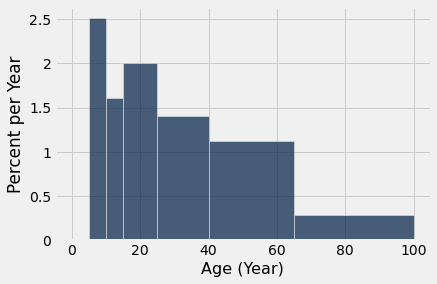

In [89]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

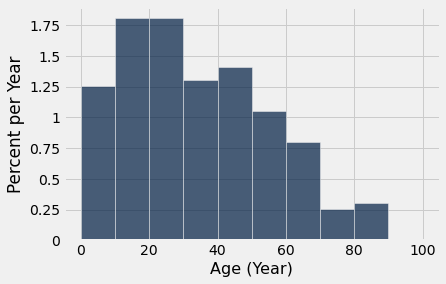

In [90]:
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

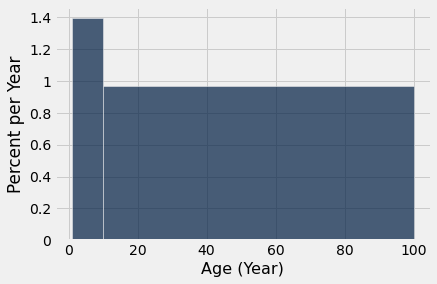

In [91]:
top_movies.hist('Age', bins = make_array(1, 10, 100), unit = 'Year')


## Differences Between Bar Charts and Histograms

* Bar charts display one quantity per category. They are often used to display the distributions of categorical variables. Histograms display the distributions of quantitative variables.
* All the bars in a bar chart have the same width, and there is an equal amount of space between consecutive bars. The bars of a histogram can have different widths, and they are contiguous.
* The lengths (or heights, if the bars are drawn vertically) of the bars in a bar chart are proportional to the value for each category. The heights of bars in a histogram measure densities; the areas of bars in a histogram are proportional to the numbers of entries in the bins.



## What is wrong with this picture?

<img src = ipad.png style="width: 500px;">
caption: The new battery is 70% larger

https://gizmodo.com/holy-f-ck-the-new-ipad-has-a-gigantic-70-percent-large-5893738

## Chart Distribution Review

#### Bar Chart
* Distribution of categorical variables
* Bars have equal yet arbitrary widths/spacing
* area = percent of individuals

#### Histogram Charts
* Distribution of numerical variables
* Horizontal axis is numberical bin width can be unequal
* area = percent of individuals
* height = percent/width

## Chart Review
* Scatter plot: relation between numerical variables
* Line graph: sequential data (time or distance)
* Bar chart: distribution of categorical data
* Histogram: distribution of numerical data

In [92]:
# Create some fake weather data for a discussion question
weather = Table().with_columns('Day', np.arange(1, 366),
                              'High',  np.round(np.random.uniform(low=70, high=100, size=365),1),
                              'Low',  np.round(np.random.uniform(low=32, high=70, size=365),1),
                              'Sky Condition', np.random.choice(['Cloudy', 'Sunny'], 365, p=[0.49, 0.51]))
                
weather

Day,High,Low,Sky Condition
1,94.2,37.3,Cloudy
2,75.6,61.3,Cloudy
3,95.3,51.1,Cloudy
4,73,68.3,Cloudy
5,91.2,66,Sunny
6,81.6,33.2,Cloudy
7,86.7,65.9,Cloudy
8,91.8,34.6,Cloudy
9,76,60.2,Sunny
10,73.6,33.5,Cloudy


### Create a chart to answer the following questions about the weather table
1) Are there more cloudy than sunny days?

2) What percentage of days have a high above 72 degrees?

3) Do hotter days have hotter nights?

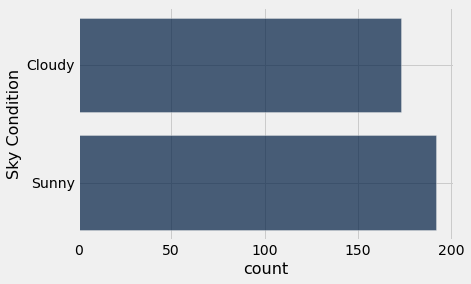

In [93]:
weather.group('Sky Condition').barh('Sky Condition')

0.9342465753424658

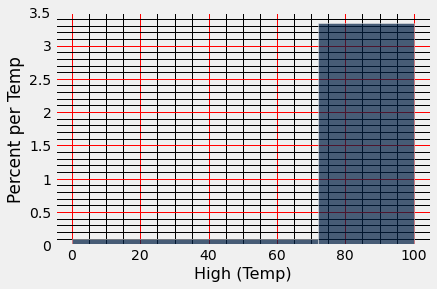

In [94]:
weather.hist('High', bins = make_array(0, 72, 100), unit = 'Temp')
plots.minorticks_on()
plots.grid(b=True, which='minor', color = 'k')
plots.grid(b=True, which='major', color = 'r')
weather.where('High', are.above_or_equal_to(72)).num_rows/weather.num_rows

In [97]:
weather.where('High', are.above_or_equal_to(72)).num_rows/365

0.9342465753424658

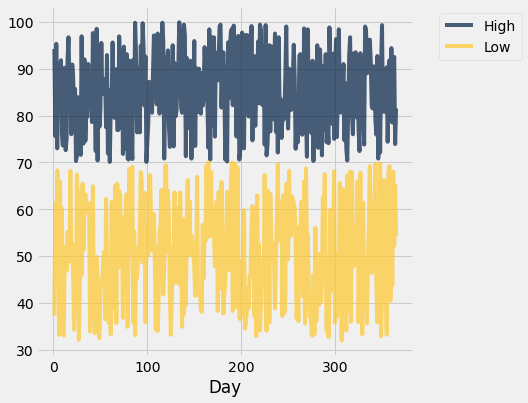

In [98]:
weather.select('Day' ,'High', 'Low').plot('Day')

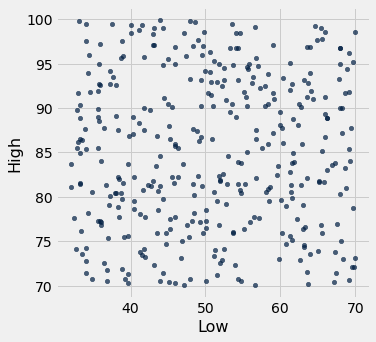

In [99]:
weather.scatter('Low', 'High')